# European Centre for Medium Range Weather Forecasts

Presentado por: Yosef Guevara Salamanca

### Descarga del script

[Download script](https://gist.github.com/mrocklin/26d8323f9a8a6a75fce0)

Download historical global weather data from the ECMWF.

**Try the following:**

### Estableciendo del cliente dask

Lo primero que se realizara sera generar un cliente que contará con 4 workers y 4 hilos por worker con un máximo de memoria a utilizar de 1GB

In [1]:
from dask.distributed import Client
client = Client(n_workers=2, threads_per_worker=4, memory_limit='1GB')
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 8,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:52173,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:52185,Total threads: 4
Dashboard: http://127.0.0.1:52186/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:52176,


In [2]:
## Llamado a las librerias

import pandas as pd 
import netCDF4 as nc
import xarray as xr

### Sobre xarray

Se utilizara la libreria **xarray** que permite una trabajar facilmente con arrays multidimencionales, Está especialmente adaptado para trabajar con archivos netCDF, que fueron la fuente del modelo de datos de xarray, y se integra estrechamente con dask para la computación en paralelo. 

Más información en el siguiente link:

https://xarray.pydata.org/en/stable/index.html

In [3]:
## Se genera un xarray que funcionara con Dask en paralelo 
## y creara chunks de 90 datos temporales

ds_disk = xr.open_mfdataset("D:\Descargas\Temperaturas\A-2014-*.nc", parallel=True,chunks={"time": 90})

Se muestran los chunks creados en este caso 12 chunks.

In [4]:
ds_disk.t2m

<xarray.DataArray 't2m' (time: 365, latitude: 241, longitude: 480)>
dask.array<concatenate, shape=(365, 241, 480), dtype=float32, chunksize=(31, 241, 480), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2014-01-01T12:00:00 ... 2014-12-31T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [5]:
ds_disk["t2m"].encoding

{'source': 'D:\\Descargas\\Temperaturas\\A-2014-01.nc',
 'original_shape': (31, 241, 480),
 'dtype': dtype('int16'),
 'missing_value': -32767,
 '_FillValue': -32767,
 'scale_factor': 0.0015751613977672747,
 'add_offset': 262.6617414110003}

### 1.  What is the variance in temperature over time?

Se crea un vector que contiene la varianza de las temperaturas de todo el año:


In [6]:
## Vector de varianzas de temperatura

temperaturas = ds_disk.t2m.values - 273.15
var_temperaturas = temperaturas.var(axis=(1,2))
var_temperaturas[1:5]

array([387.79434, 387.1582 , 389.3583 , 391.49265], dtype=float32)

In [7]:
## Se importa la libreria datetime

from datetime import datetime

In [8]:
## Se genera un vector de fechas comenzando en el 2014-01-02

fechas = pd.date_range(start="2014-01-02", periods=365).tolist()
fechas[1:5]

[Timestamp('2014-01-03 00:00:00', freq='D'),
 Timestamp('2014-01-04 00:00:00', freq='D'),
 Timestamp('2014-01-05 00:00:00', freq='D'),
 Timestamp('2014-01-06 00:00:00', freq='D')]

In [9]:
## Se llama a la libreria matplotlib

import matplotlib.pyplot as plt

Finalmente la varianza de las temperaturas del año 2014 esta dada por:

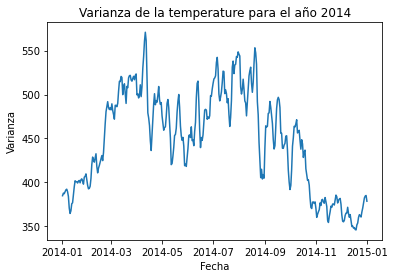

In [10]:
plt.plot(fechas, var_temperaturas)
plt.xlabel('Fecha')
plt.ylabel('Varianza')
plt.title('Varianza de la temperature para el año 2014')
plt.show()

### 2. What areas experienced the largest temperature swings in the last month relative to their previous history?


Se crea una grafica que analizara cada mes calculara su media y finalmente la desviación estandar lo cual nos permitira visualizar las areas donde se ha presentado una mayor variación de la temperatura

El **remuestreo** es generado para poder tener más datos de una misma localización y mejorar la visualización del grafico

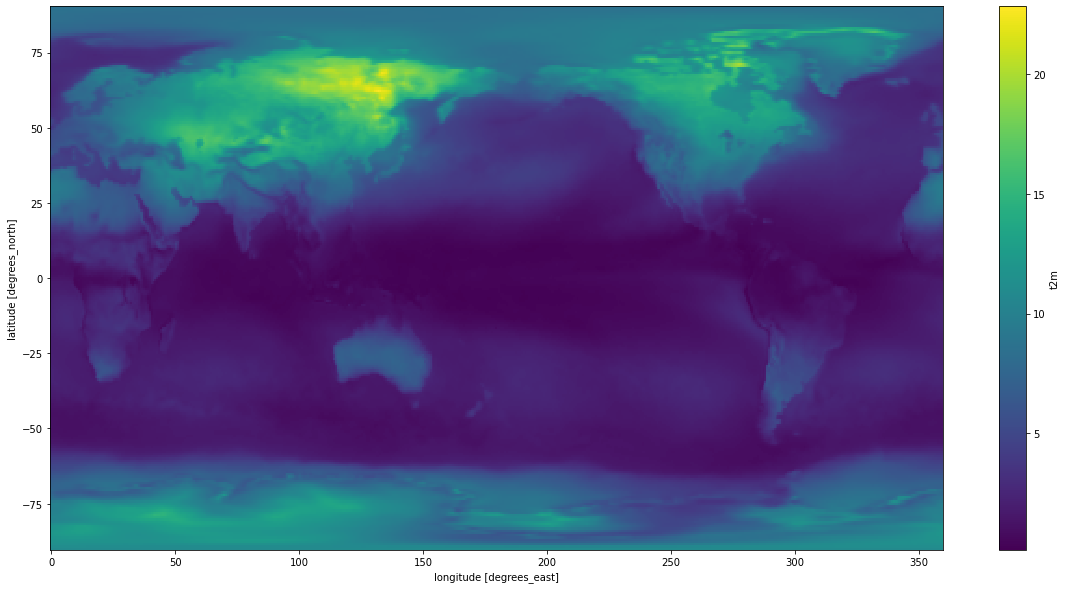

In [11]:
da = ds_disk.t2m
da.resample(time='1m').mean('time').std('time').plot(figsize=(20, 10))

Se aprecia que la zona con mayor variación de la temperatura fue el **noreste de rusia** fuertemente resaltado en color amarillo

### 3. Plot the temperature of the earth as a function of latitude and then as longitude

In [12]:
## Se crean 2 vectores que contienen la longitud y la latitud

longitud = ds_disk.longitude
latitud = ds_disk.latitude

In [13]:
## Se calcula el promedio de las temperaturas para la longitud

prom_tem_longitud = temperaturas.mean(axis=(0,1))
len(prom_tem_longitud)

480

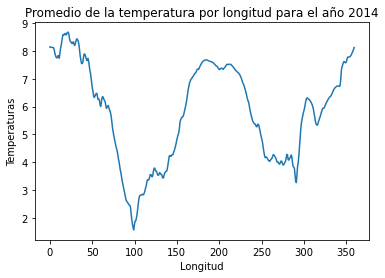

In [14]:
plt.plot(longitud, prom_tem_longitud)
plt.xlabel('Longitud')
plt.ylabel('Temperaturas')
plt.title('Promedio de la temperatura por longitud para el año 2014')
plt.show()

In [15]:
## Se calcula el promedio de las temperaturas para la latitud

prom_tem_latitud = temperaturas.mean(axis=(0,2))
len(prom_tem_latitud)

241

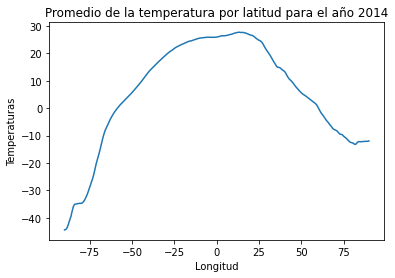

In [16]:
plt.plot(latitud, prom_tem_latitud)
plt.xlabel('Longitud')
plt.ylabel('Temperaturas')
plt.title('Promedio de la temperatura por latitud para el año 2014')
plt.show()